# Hypothesis Testing Study

## What is Hypothesis Testing? 

**Hypothesis testing** is the statistical method of making decisions of a population based on data from samples. It helps to determine whether a there is enough data to make a claim about the population. 

- Null Hypothesis (H₀): This is the default assumption or status quo. For example, “There is no difference” or “The effect is zero.”
- Alternative Hypothesis (H₁ or Ha): This is what you want to prove. For example, “There is a difference” or “The effect is not zero.”

In this study, we will investigate the following made-up case: 

*"Does the monthly profit made by a specific ice cream shop significantly higher from the average monthly profit (20,000$) made by ice cream shops across the country?"*


In this case,

- **H₀**: There is no significant difference between the specific annual profit and 20,000$, or the specific shop profit is lower.

- **H₁**: The specific shop profit is significantly higher than 20,000$.

# Imports

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from scipy import stats

# Histogram Visualization and P-Value

/var/folders/8q/zdqsp3_d4lv38ktgq943f9n80000gn/T/ipykernel_92491/3395595491.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color="blue", linewidth=1, label='Normal Curve', alpha=0.4)


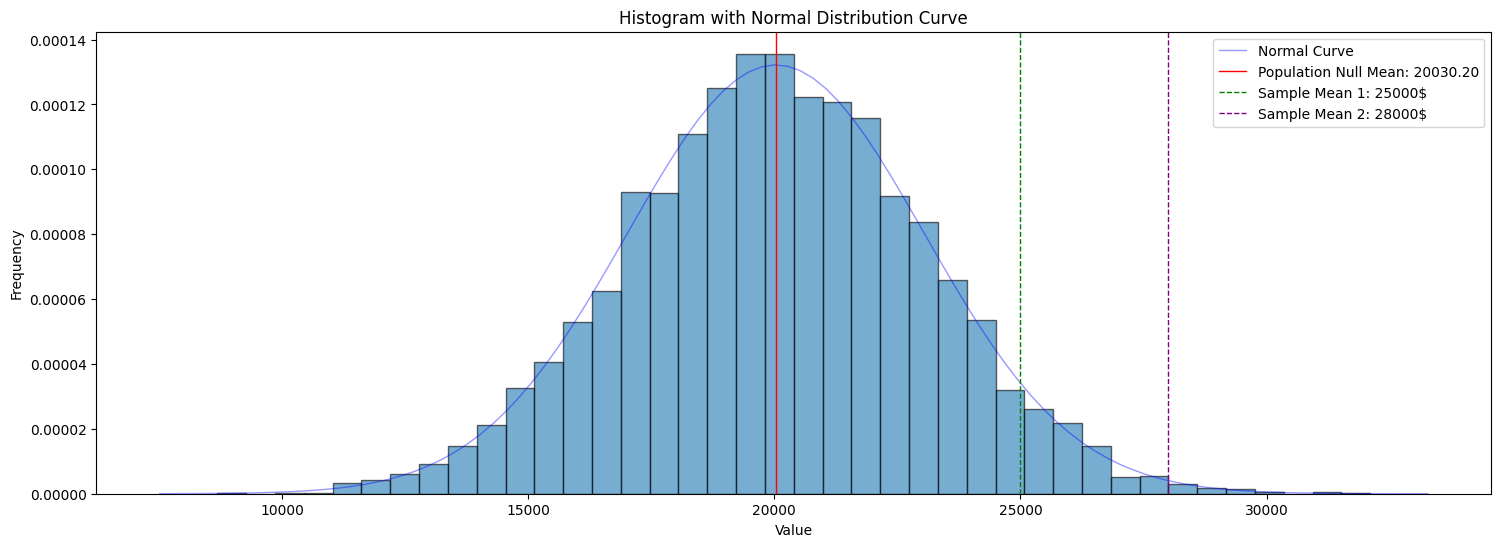

In [190]:
# Generate normally distributed data centered around 20,000
data = np.random.normal(loc=20000, scale=3000, size=5000)

# Create histogram
plt.figure(figsize=(18, 6))
plt.hist(data, bins=40, density=True, edgecolor='black', alpha=0.6)

# Plot normal distribution curve
null_mean = np.mean(data)
std = np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, null_mean, std)
plt.plot(x, y, 'r', color="blue", linewidth=1, label='Normal Curve', alpha=0.4)

# Add labels and legend
plt.title('Histogram with Normal Distribution Curve')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(null_mean, color='red', linestyle='-', linewidth=1, label=f'Population Null Mean: {null_mean:.2f}')
plt.axvline(25000, color='green', linestyle='--', linewidth=1, label=f'Sample Mean 1: 25000$')
plt.axvline(28000, color='purple', linestyle='--', linewidth=1, label=f'Sample Mean 2: 28000$')
plt.legend()

# Show the plot
plt.show()

The graph above describes the 

# Central Limit Theorem Demonstration

# Test Statistics

A test statistic is a number calculated from sample data that helps us decide whether to reject the null hypothesis. Common test statistics include the *t-value, z-value, and chi-square*. We use the test statistic to calculate a p-value, which tells us how extreme our sample result is under the assumption that the null hypothesis is true.

In this example, we will use the t-value to demonstrate the core idea of hypothesis testing. The reason for using t-value is because it this parameter is commonly used when there aren't a super abundant number of data. 

t-value formula: 

![t-value equation](https://study.com/cimages/multimages/16/geogebra-export--7-9218705377612374794.png)

- 𝑥̄: Sample mean
- μ₀: Population mean under the null hypothesis
- s: Sample standard deviation
- n: Sample size
- s/√n: standard error

### Standard Deviation vs Standard Error

- Standard Deviation: The spread of the raw population data. 
- Standard Error: The spread of the sample means that were taken by randomly sampling the population. 

The reason we use SE for calculating t-value is because it represents the spread of the sample mean and the accuracy of the sample means as an estimation of the population mean. In hypothesis testing, we are not interested in the actual spread of each data point, but in how different each sample mean could be from the population mean due to random chance. 

952.5851941059275


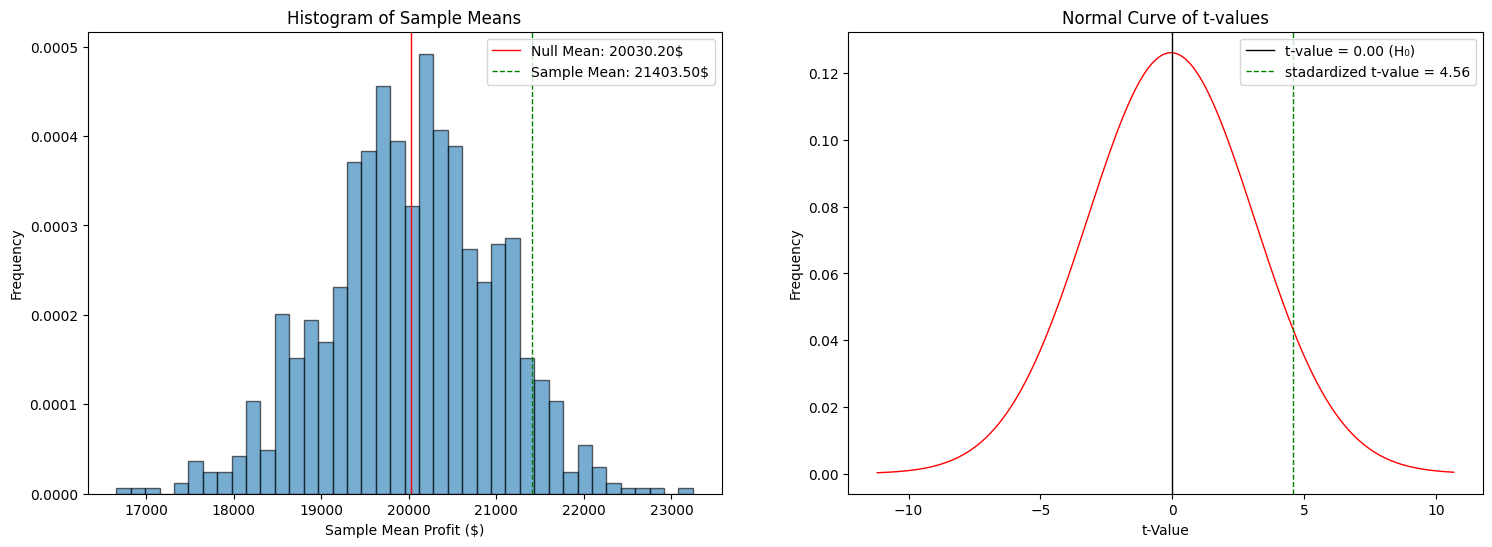

In [191]:
plt.figure(figsize=(18, 6))
# makes samples and histogram of sample means
sample_means = []
observed_mean = 21403.50 # ave annual profit of specific ice cream shop
n = 10 # sample size
for i in range(1000):
    mean = 0
    for i in range(10):
        mean += np.random.choice(data)
    mean = mean/10
    sample_means.append(mean)

plt.subplot(1,2,1)
plt.hist(sample_means, bins=40, density=True, edgecolor='black', alpha=0.6)
plt.axvline(null_mean, color='red', linestyle='-', linewidth=1, label=f'Null Mean: {null_mean:.2f}$')
plt.axvline(observed_mean, color='green', linestyle='--', linewidth=1, label=f'Sample Mean: {observed_mean:.2f}$')
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean Profit ($)')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# take t-values
tvalues = []
std = np.std(sample_means) # sample standard deviation
print(std)
SE = std/(math.sqrt(10))
for i, value in enumerate(sample_means):
    t = (sample_means[i] - null_mean)/(SE)
    tvalues.append(t)
x = np.linspace(min(tvalues), max(tvalues), 1000)
p = norm.pdf(x, np.mean(tvalues), np.std(tvalues))

plt.subplot(1,2,2)
plt.plot(x, p, 'r', linewidth=1)
null_t = (null_mean - null_mean)/(SE)
observed_t = (observed_mean - null_mean)/(SE)
plt.axvline(null_t, color='black', linestyle='-', linewidth=1, label=f't-value = {null_t:.2f} (H₀)')
plt.axvline(observed_t, color='green', linestyle='--', linewidth=1, label=f'stadardized t-value = {observed_t:.2f}')
plt.title('Normal Curve of t-values')
plt.xlabel('t-Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# p-value to t-value Conversion

### p-value

**p-value** is the probability fo 

### Degree of Freedom (df)

Degree of Freedom (df) is how many numbers in a sample can be changed for the mean to still be fixed. 

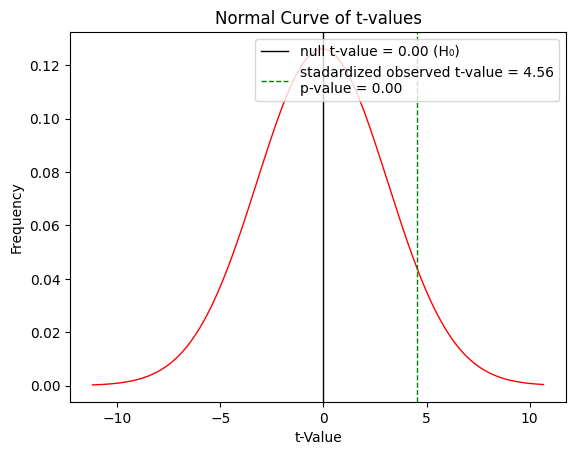

In [192]:
p_value = 1 - stats.t.cdf(observed_t, df=n-1)

plt.plot(x, p, 'r', linewidth=1)
plt.axvline(null_t, color='black', linestyle='-', linewidth=1, label=f'null t-value = {null_t:.2f} (H₀)')
plt.axvline(observed_t, color='green', linestyle='--', linewidth=1, label=f'stadardized observed t-value = {observed_t:.2f}\np-value = {p_value:.2f}')
plt.title('Normal Curve of t-values')
plt.xlabel('t-Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Significance Level (a) and Critical Value

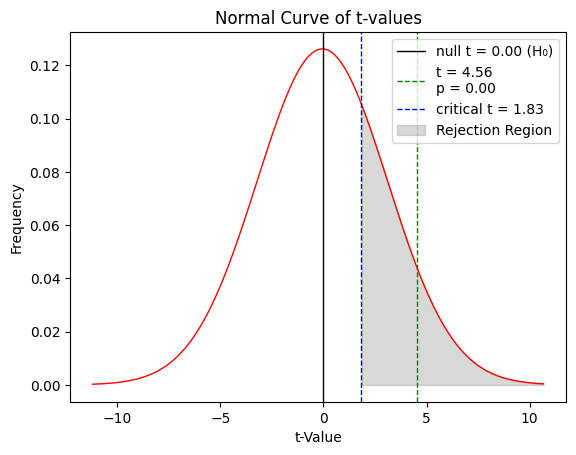

In [193]:
alpha = 0.05
df = n - 1
critical_value = stats.t.ppf(1 - alpha, df=df)

plt.plot(x, p, 'r', linewidth=1)
plt.axvline(null_t, color='black', linestyle='-', linewidth=1, label=f'null t = {null_t:.2f} (H₀)')
plt.axvline(observed_t, color='green', linestyle='--', linewidth=1, label=f't = {observed_t:.2f}\np = {p_value:.2f}')
plt.axvline(critical_value, color='blue', linestyle='--', linewidth=1, label=f'critical t = {critical_value:.2f}')
plt.fill_between(x, 0, p, where=(x >= critical_value), color='grey', alpha=0.3, label='Rejection Region')
plt.title('Normal Curve of t-values')
plt.xlabel('t-Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')